In [1]:
import pandas as pd

data = pd.read_csv("E:/Data Science/CSV dataset/cnt_km_year_powerPS_minPrice_maxPrice_avgPrice_sdPrice.csv")
data

,count,km,year,powerPS,minPrice,maxPrice,avgPrice,sdPrice
0,19,125000,1991,40,300,1499,648.3158,352.035293
1,69,150000,1991,40,110,1600,516.4348,346.767661
2,11,90000,1991,60,330,10000,2342.4545,3017.432333
3,26,100000,1991,60,200,8750,1392.3846,1598.662833
4,42,125000,1991,60,150,4600,1140.6429,1010.314138
...,...,...,...,...,...,...,...,...
1765,24,20000,2015,260,25490,73000,49492.3750,17182.173184
1766,16,10000,2015,300,699,60000,38542.6875,12924.901241
1767,25,20000,2015,300,487,82700,39683.3200,13065.072294
1768,22,10000,2015,320,33000,68450,50372.6364,10736.265072


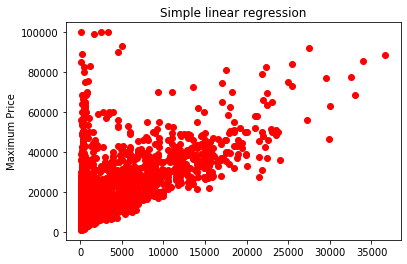

In [4]:
## Plotting scatter plot of Preliminary data for trends
## taking MaxPrice as dependent variable and MinPrice as independent variable

import matplotlib.pyplot as plt

plt.scatter(data['maxPrice'], data['minPrice'], color = 'red')
plt.ylabel('Maximum Price')
plt.title('Simple linear regression')
plt.show()

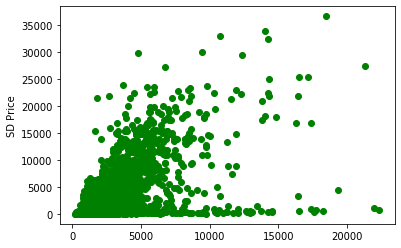

In [5]:
## taking sdPrice as second dependent variable and MinPrice as independent variable

# Plotting scatter plot

plt.scatter(data['sdPrice'], data['minPrice'], color = 'green')
plt.ylabel('SD Price')
plt.show()

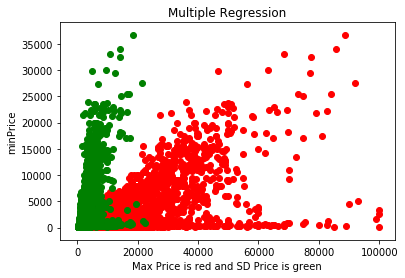

In [8]:
## Plotting both variables together 

import matplotlib.pyplot as plt

plt.figure()
plt.scatter(data['maxPrice'], data['minPrice'], color = 'red')
plt.scatter(data['sdPrice'], data['minPrice'], color = 'green')
plt.title('Multiple Regression')
plt.ylabel('minPrice')          ## Keeping independent variable on y axis
plt.xlabel('Max Price is red and SD Price is green')
plt.show()

In [18]:
## Now doing the analysis using ANOVA

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

df = pd.melt(data.reset_index(), id_vars = ['index'], value_vars = ['minPrice', 'maxPrice', 'sdPrice'])
df.columns = ['index', 'Price', 'values']
df

,index,Price,values
0,0,minPrice,300.000000
1,1,minPrice,110.000000
2,2,minPrice,330.000000
3,3,minPrice,200.000000
4,4,minPrice,150.000000
...,...,...,...
5305,1765,sdPrice,17182.173184
5306,1766,sdPrice,12924.901241
5307,1767,sdPrice,13065.072294
5308,1768,sdPrice,10736.265072


In [20]:
## Creating OLS Regression Results 

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('values ~ C(Price)', data = df).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 values   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     1803.
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        16:52:57   Log-Likelihood:                -56492.
No. Observations:                5310   AIC:                         1.130e+05
Df Residuals:                    5307   BIC:                         1.130e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.144e+04    240.049     89.316      0.000     2.1e+04    2.19e+04
C(Price)[T.minPrice] -1.728e+04    339.480    -50.898      0.000   -1.79e+04   -1.66e+04
C(Price)[T.sdPrice]  -1.801e+04    339.480    -53.045      0.000   -1.87e+04   -1.73e+04
==============================================================================
Omnibus:                     2631.111   Durbin-Watson:                   0.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26625.457
Skew:                           2.136   Prob(JB):                         0.00
Kurtosis:                      13.104   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R Squared is nearly equal to the adjusted R Square. It means we need not to add any more variables and our model is good and stable as it is giving desired results.

PERFORMING MULTIPLE REGRESSION

In [23]:
# taking only required columns from dataset which are needed for evaluation
# minprice = independent variable
# maxprice = independent variable
# sdprice = dependent variable 


data_new = data[['minPrice','maxPrice','sdPrice']]
data_new

,minPrice,maxPrice,sdPrice
0,300,1499,352.035293
1,110,1600,346.767661
2,330,10000,3017.432333
3,200,8750,1598.662833
4,150,4600,1010.314138
...,...,...,...
1765,25490,73000,17182.173184
1766,699,60000,12924.901241
1767,487,82700,13065.072294
1768,33000,68450,10736.265072


In [25]:
from statsmodels.formula.api import ols

# using only one independent variable
reg1 = ols(formula = "minPrice ~ sdPrice", data = data_new)
fit1 = reg1.fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:               minPrice   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     727.4
Date:                Mon, 04 May 2020   Prob (F-statistic):          1.76e-134
Time:                        18:03:51   Log-Likelihood:                -17448.
No. Observations:                1770   AIC:                         3.490e+04
Df Residuals:                    1768   BIC:                         3.491e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    624.7963    171.104      3.652      0.0

R Squared value is 0.297 or 29.7%... that means our model is not good. value should be above 50% or 0.5

In [26]:
# Now taking both independent variable to make our model better

from statsmodels.formula.api import ols

reg2 = ols(formula = 'sdPrice ~ maxPrice + minPrice', data = data_new)
fit2 = reg2.fit()
print(fit2.summary())


                            OLS Regression Results                            
Dep. Variable:                sdPrice   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     3223.
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        18:08:02   Log-Likelihood:                -15249.
No. Observations:                1770   AIC:                         3.050e+04
Df Residuals:                    1767   BIC:                         3.052e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     92.7797     52.358      1.772      0.0

Now R squared value is .785 or 78.5% so it means that our regression model is more stable and accurate than previous ones but the real result is cross checked with the value of adjusted R squared value.